# Flight Price Prediction_Project is a Regression Model

In [1]:
print(('*'*127))
print("                                                      Flight Price Prediction                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Flight Price Prediction                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel("FlightPrice_Data_Train.xlsx")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 11)


df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [3]:
df.shape

(10683, 11)

* Here we that there is 10683 Rows and 11 Columns for this Dataset

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* Here we observe that majority of the Columns are of object type and Price is our Target variable

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Here we observe that we just have one Null row for Route and Total_stops columns

# Dataset Descirption

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

You will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Airline companies use complex algorithms to calculate flight prices given various conditions present at that particular time. These methods take financial, marketing, and various social factors into account to predict flight prices.

The number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.


# Attributes

The Following are the attributes to help predict the prices:

* (1) Airline - The specified Airline company

* (2) Date_of_Journey	Source - The specified date of Journey 

* (3) Source - The state from which the boarding begins

* (4) Destination	Route - The complete flight path of the journey

* (5) Dep_Time -The exact time of departure

* (6) Arrival_Timez - The specified time of arrival at the destination

* (7) Duration - The duration of the flight hours

* (8) Total_Stops - The total amount of stops during the journey

* (9) Additional_Info - The type of travel plan descided by the individual

* (10) Price - The amount denoted for the total travel to the destination

# Data Cleaning

In [6]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["Total_Stops"] = lb.fit_transform(df["Total_Stops"])

In [7]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [8]:
df['Route']=df['Route'].fillna(np.mean(df['Route'])) 

# Checking VIF ( Variance Inflation Factor )

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0      3.0             24.0     0.0          5.0   18.0     211.0   
1      1.0              6.0     3.0          0.0   84.0      31.0   
2      4.0             43.0     2.0          1.0  118.0      70.0   
3      3.0             10.0     3.0          0.0   91.0     164.0   
4      3.0              0.0     0.0          5.0   29.0     149.0   

   Arrival_Time  Duration  Total_Stops  Additional_Info  
0         233.0     240.0            4              8.0  
1         906.0     336.0            1              8.0  
2         413.0     106.0            1              8.0  
3        1324.0     311.0            0              8.0  
4        1237.0     303.0            0              8.0

In [10]:
calculate_vif(F)

F  VIF_Value
0          Airline   3.680683
1  Date_of_Journey   5.083470
2           Source   5.711186
3      Destination   3.032373
4            Route   7.904421
5         Dep_Time   3.913047
6     Arrival_Time   7.266031
7         Duration   4.409841
8      Total_Stops   2.322772
9  Additional_Info  21.508800

* Here we do not find any NaN or Single values for any column or and there is no multicolinearity

# Outlier Check and Removal

In [11]:
df1 = df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']]

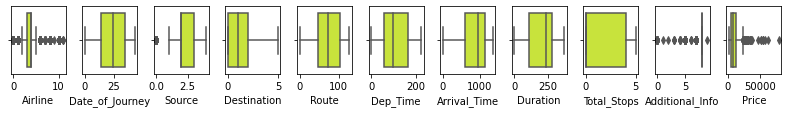

In [12]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='gist_ncar')
    plt.tight_layout()

In [13]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(10683, 11)

In [14]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

In [15]:
new_df.shape

(10578, 11)

# DataLoss %

In [16]:
Loss = (10683/10578)/10578*100

In [17]:
Loss

0.009547421649208907

* Here we observe a Datasloss of 0.009% after the Outlier check adnd removal

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Density'>

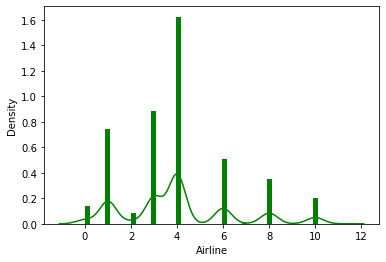

In [18]:
sn.distplot(new_df["Airline"], hist_kws={'alpha':1}, color='g')

* Here we observe a moderately skewed distribution of data

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Density'>

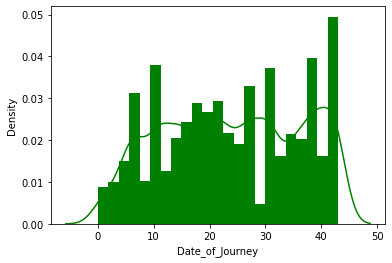

In [19]:
sn.distplot(new_df["Date_of_Journey"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Destination', ylabel='Density'>

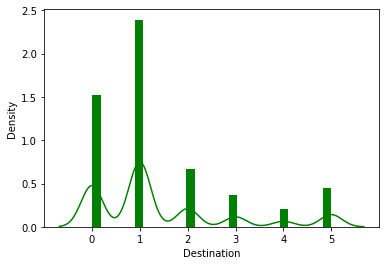

In [20]:
sn.distplot(new_df["Destination"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Route', ylabel='Density'>

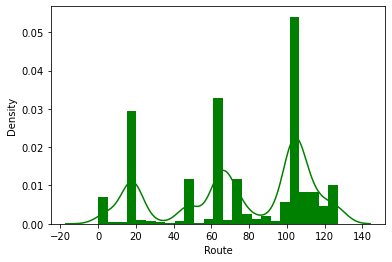

In [21]:
sn.distplot(new_df["Route"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

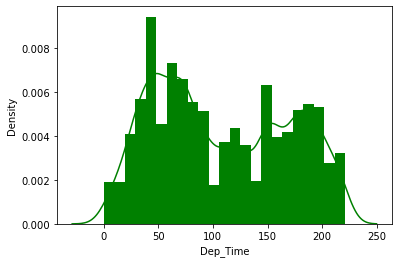

In [22]:
sn.distplot(new_df["Dep_Time"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

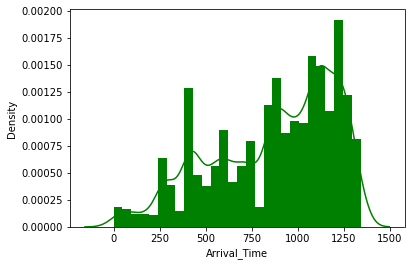

In [23]:
sn.distplot(new_df["Arrival_Time"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Duration', ylabel='Density'>

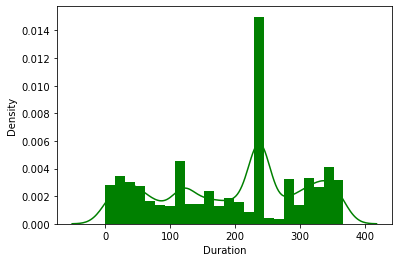

In [24]:
sn.distplot(new_df["Duration"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

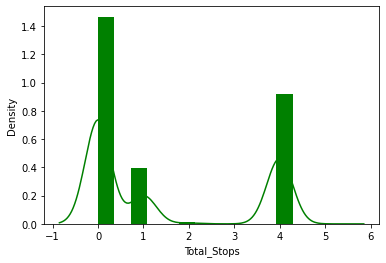

In [25]:
sn.distplot(new_df["Total_Stops"], hist_kws={'alpha':1}, color='g') 

* Here we observe mild skewness of data distribution

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

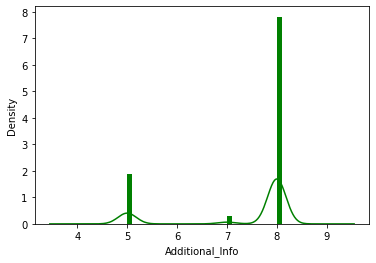

In [26]:
sn.distplot(new_df["Additional_Info"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed negative distribution of data

<AxesSubplot:xlabel='Price', ylabel='Density'>

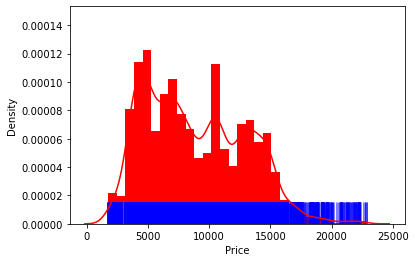

In [27]:
sn.distplot(new_df["Price"],bins=30,hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.1})

* Here we observe a good distribution of data

# Scatterplot

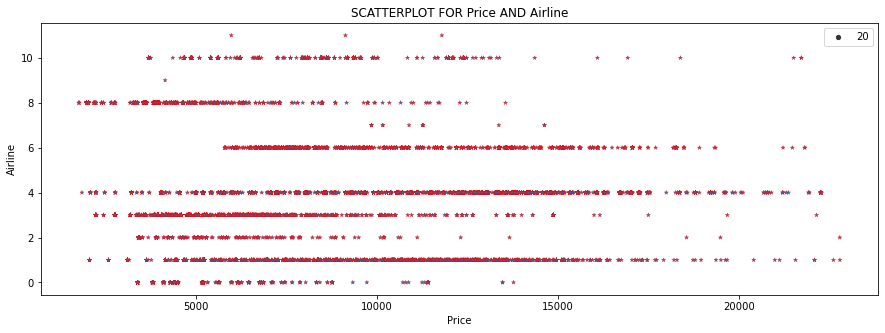

In [28]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Airline')

sn.scatterplot(new_df['Price'], new_df['Airline'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe AirlineNo 1(airIndia),6(multiple carriers) has majority distributed for all Prices data

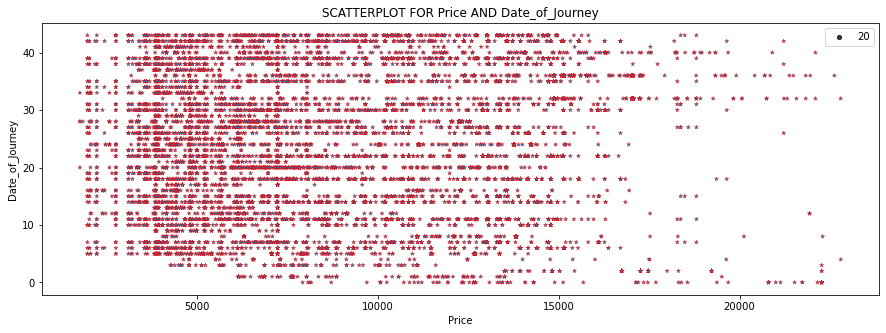

In [29]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Date_of_Journey')

sn.scatterplot(new_df['Price'], new_df['Date_of_Journey'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Date_of_Journey data is well distributed for all Prices

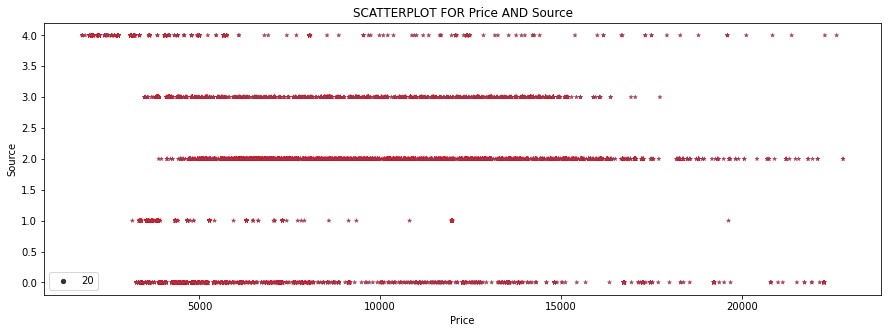

In [30]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Source')

sn.scatterplot(new_df['Price'], new_df['Source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Source No 0(Banglore),2(Kolkota),3(Delhi) has majority distribution for all Price data

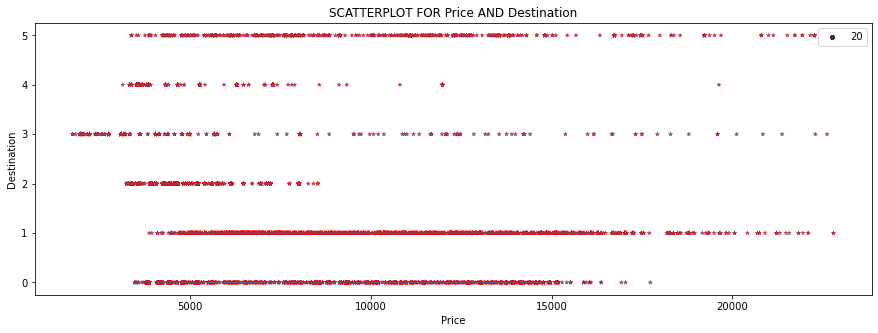

In [31]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Destination')

sn.scatterplot(new_df['Price'], new_df['Destination'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Destination 0(Banglore),1(Cochin),5(Delhi) has majority data distributed for all Prices data

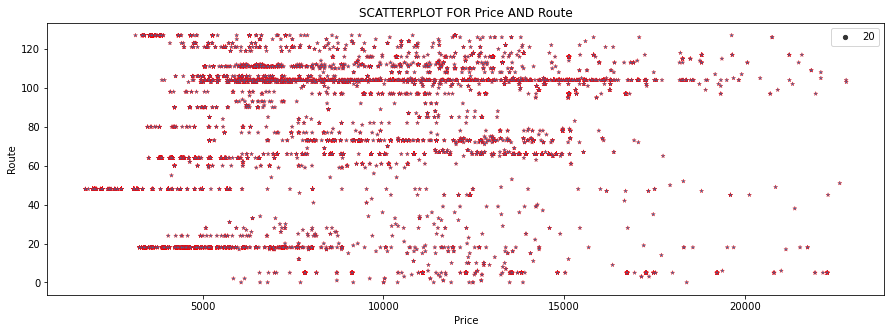

In [32]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Route')

sn.scatterplot(new_df['Price'], new_df['Route'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Route No 100 has majority of distribution for all Price data

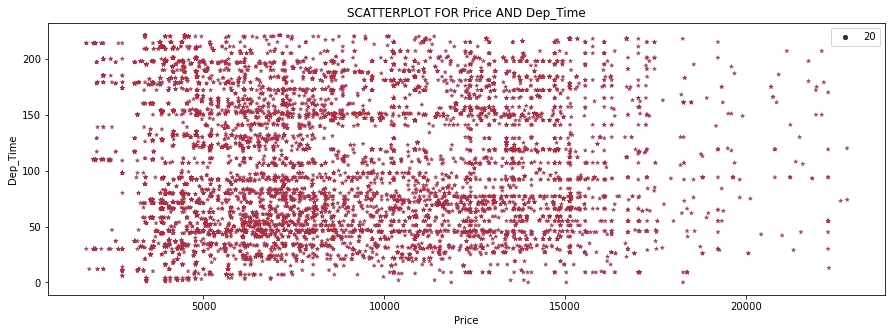

In [33]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Dep_Time')

sn.scatterplot(new_df['Price'], new_df['Dep_Time'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Dep_Time data is well distributed for all Prices data

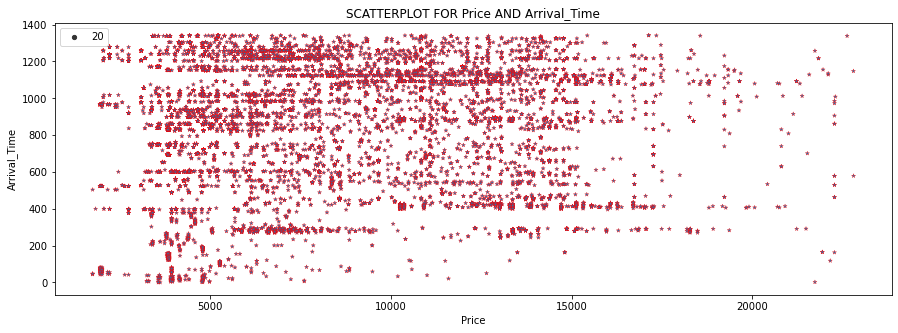

In [34]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Arrival_Time')

sn.scatterplot(new_df['Price'], new_df['Arrival_Time'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Arrival_Time data is well distributed for all Prices data

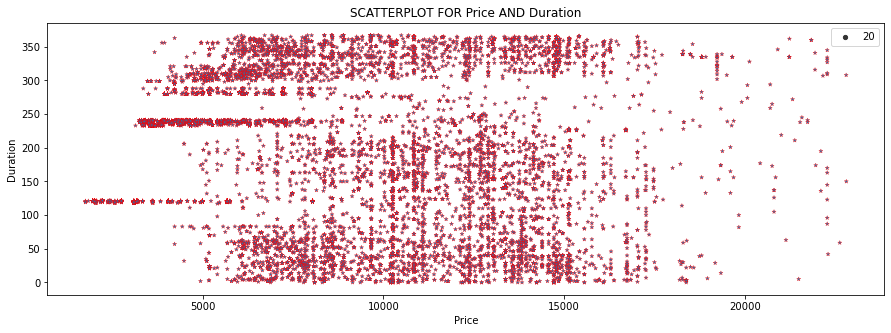

In [35]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Duration')

sn.scatterplot(new_df['Price'], new_df['Duration'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Duration data is well distributed for all Prices data

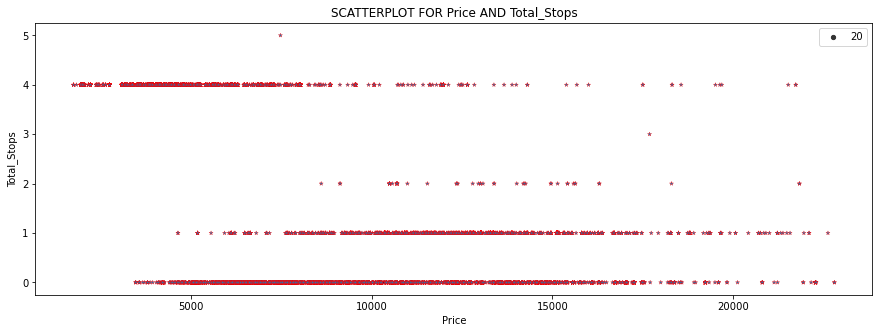

In [36]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Total_Stops')

sn.scatterplot(new_df['Price'], new_df['Total_Stops'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Total_Stops 0 has majority of distribution for all Prices data

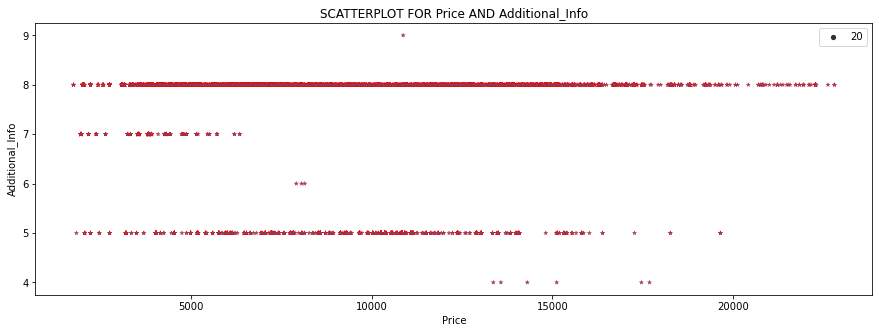

In [37]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Additional_Info')

sn.scatterplot(new_df['Price'], new_df['Additional_Info'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Additional_Info type 8 has majority distribution for all Prices

# Catplot

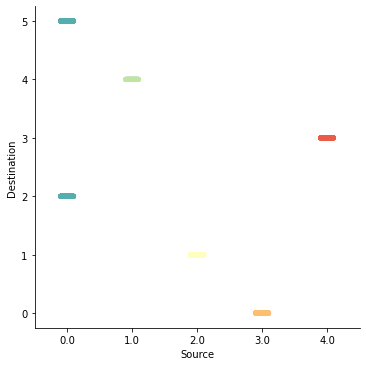

In [38]:
sn.catplot(x="Source", y="Destination", kind='strip',data=df, alpha=0.5, color='k', palette="Spectral_r")

* Here we observe source data Banglore has the most destaination data on Delhi and New Delhi

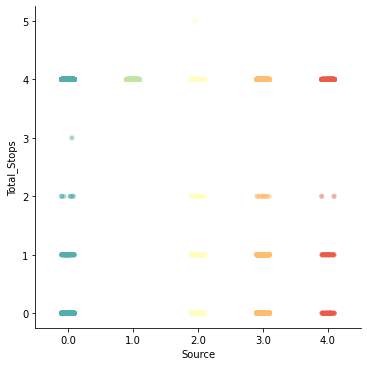

In [39]:
sn.catplot(x="Source", y="Total_Stops", kind='strip',data=df, alpha=0.5, color='k', palette="Spectral_r")

* Here we observe a good distribution categorical data all sources have Total stops in all locations

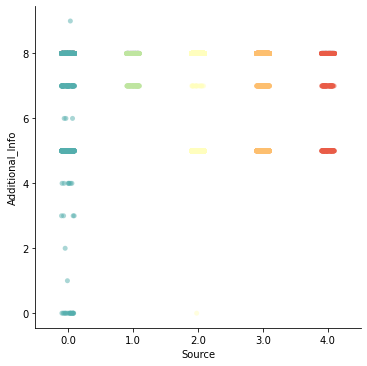

In [40]:
sn.catplot(x="Source", y="Additional_Info", kind='strip',data=df, alpha=0.5, color='k', palette="Spectral_r")

* Here we observe that Source Banglore mostly have majority data on all categories of Additional_ info where Info No info, In-flight meal not included, No check-in baggage included being on the majority side

# Countplot

<AxesSubplot:xlabel='count', ylabel='Dep_Time'>

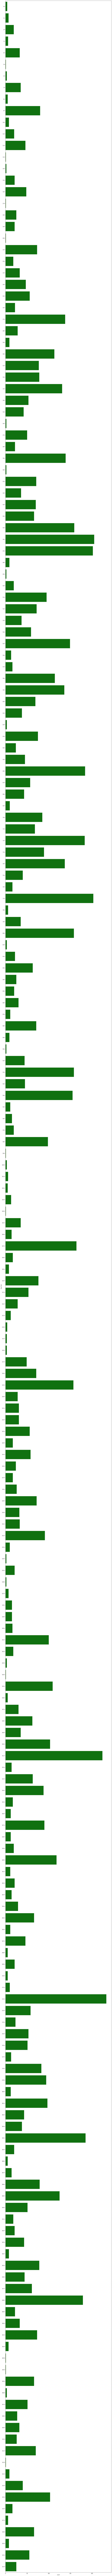

In [41]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['Dep_Time'], data=new_df, color='g')

* Here we observe that highest value count for Dep_Time is at encoded value 46.0, 47.0

<AxesSubplot:xlabel='count', ylabel='Duration'>

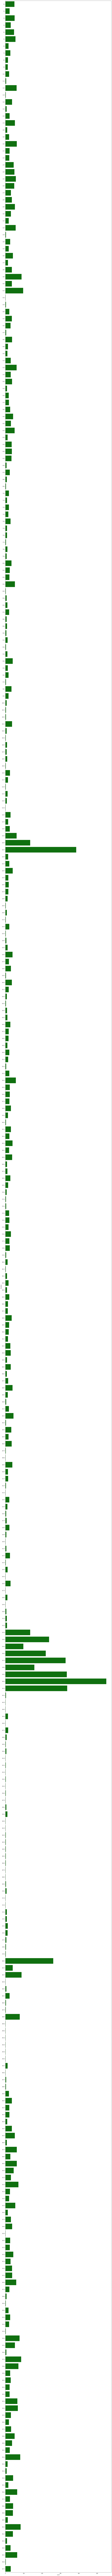

In [42]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['Duration'], data=new_df, color='g')

* Here we observe that highest value count for Duration is 240.0

<AxesSubplot:xlabel='count', ylabel='Price'>

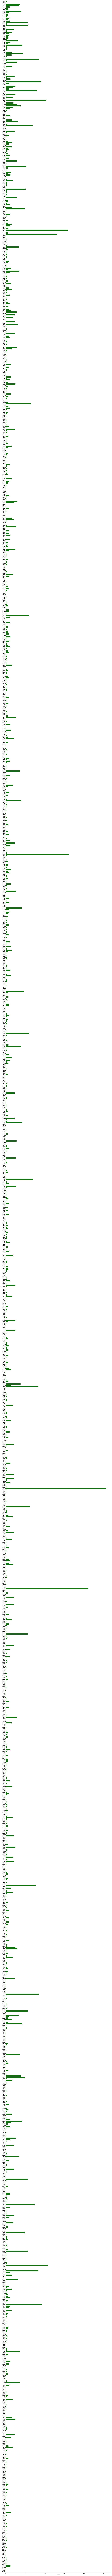

In [43]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['Price'], data=new_df, color='g')

* Here we observe that highest value count for Price is Rs10,844

# BiVariate Analysis

# Pairplot

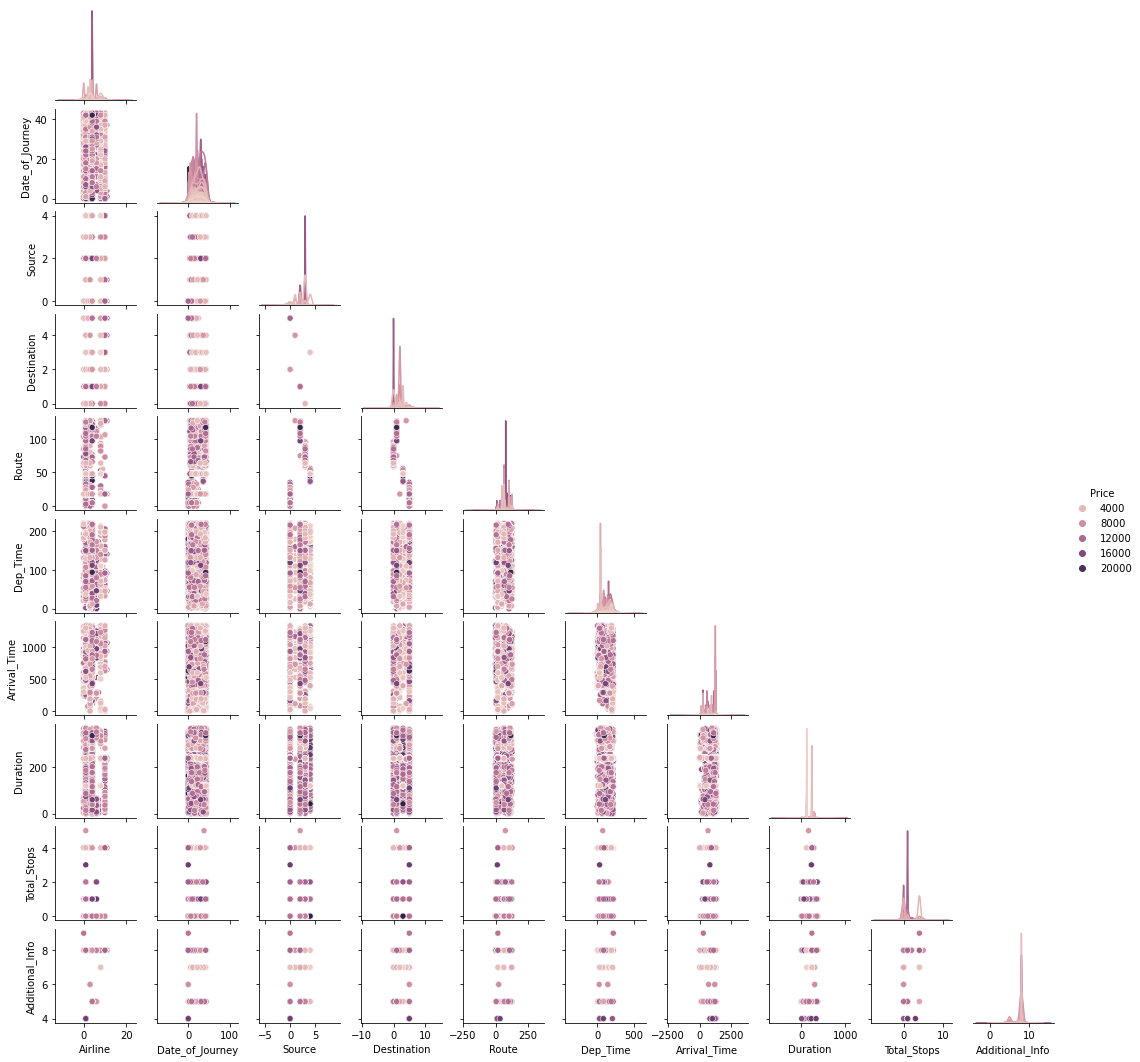

In [44]:
sn.pairplot(new_df, hue="Price", height=1.5, corner=True, diag_kws=dict(fill=False))

* In the above plot we observe the best paired distribution with the Target column is Date_of_Journey

# Stats Heatmap

In [45]:
new_df.describe()

Airline  Date_of_Journey        Source   Destination  \
count  10578.000000     10578.000000  10578.000000  10578.000000   
mean       3.968330        23.909435      1.965873      1.408773   
std        2.358492        12.210947      1.169508      1.447988   
min        0.000000         0.000000      0.000000      0.000000   
25%        3.000000        14.000000      2.000000      0.000000   
50%        4.000000        24.000000      2.000000      1.000000   
75%        4.000000        35.000000      3.000000      2.000000   
max       11.000000        43.000000      4.000000      5.000000   

              Route      Dep_Time  Arrival_Time      Duration   Total_Stops  \
count  10578.000000  10578.000000  10578.000000  10578.000000  10578.000000   
mean      75.301458    107.983551    870.172150    194.123464      1.470221   
std       36.396078     61.045733    331.344284    108.405421      1.810204   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       48.000000     55.000000    603.000000    108.000000      0.000000   
50%       74.000000     96.000000    937.000000    233.000000      0.000000   
75%      104.000000    164.000000   1141.000000    280.000000      4.000000   
max      127.000000    221.000000   1342.000000    367.000000      5.000000   

       Additional_Info         Price  
count     10578.000000  10578.000000  
mean          7.404897   8890.134241  
std           1.171695   4061.577272  
min           4.000000   1759.000000  
25%           8.000000   5228.000000  
50%           8.000000   8353.500000  
75%           8.000000  12293.000000  
max           9.000000  22798.000000

<AxesSubplot:>

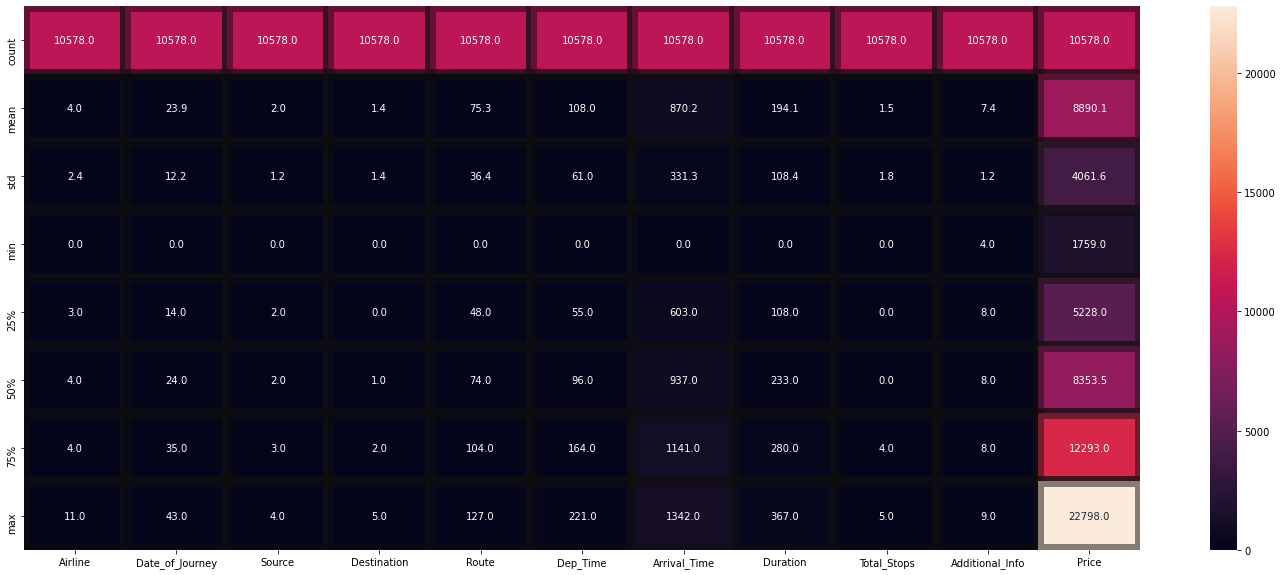

In [46]:
plt.figure(figsize=(25,10))
sn.heatmap(new_df.describe(), annot=True, linewidth=10, linecolor='#0f0f0f80', fmt='0.1f')

# Outcome of the Dataset Stats

# Total No of Rows and Columns are:
   7043, 21
   
    * Airline:
    mean: 3.968330
    std:  2.358492
    min:  0.000000
    max:  11.000000




    * Date_of_Journey	Source:
    mean: 23.909435
    std:  12.210947
    min:  0.000000
    max:  43.000000




    * Source:
    mean: 1.965873
    std:  1.169508
    min:  0.000000
    max:  4.000000




    * Destination:
    mean: 1.408773
    std:  1.447988
    min:  0.000000
    max:  5.000000





    * Route:
    mean: 75.301458
    std:  36.396078
    min:  0.000000
    max:  127.000000




    * Dep_Time:
    mean: 107.983551
    std:  61.045733
    min:  0.000000
    max:  1342.000000




    * Arrival_Time:
    mean: 870.172150
    std:  331.344284
    min:  0.000000
    max:  1342.000000




    * Duration:
    mean:194.123464
    std: 108.405421
    min: 0.000000
    max: 367.000000




    * Total_Stops:
    mean: 1.470221
    std: 1.810204
    min: 0.000000
    max: 5.000000




    * Additional_Info:
    mean: 7.404897
    std:  1.171695
    min:  4.000000
    max:  9.000000




    * Price:
    mean: 8890.134241
    std:  4061.577272
    min:  1759.000000
    max:  22798.000000

# Correlation Heatmap

In [47]:
cor=new_df.corr()
cor

Airline  Date_of_Journey    Source  Destination     Route  \
Airline          1.000000         0.020090 -0.015337     0.022091  0.022966   
Date_of_Journey  0.020090         1.000000  0.147604    -0.248458  0.256358   
Source          -0.015337         0.147604  1.000000    -0.582836  0.390602   
Destination      0.022091        -0.248458 -0.582836     1.000000 -0.442634   
Route            0.022966         0.256358  0.390602    -0.442634  1.000000   
Dep_Time        -0.040512        -0.010317  0.055609    -0.064576 -0.084288   
Arrival_Time    -0.014111        -0.011449  0.020404    -0.037906  0.011585   
Duration         0.027165        -0.002283 -0.195907     0.023403 -0.063814   
Total_Stops      0.036042        -0.055217 -0.237819     0.360222 -0.454652   
Additional_Info -0.067788        -0.012100 -0.041731     0.054736  0.018228   
Price           -0.044490         0.025602  0.077214    -0.175523  0.255377   

                 Dep_Time  Arrival_Time  Duration  Total_Stops  \
Airline         -0.040512     -0.014111  0.027165     0.036042   
Date_of_Journey -0.010317     -0.011449 -0.002283    -0.055217   
Source           0.055609      0.020404 -0.195907    -0.237819   
Destination     -0.064576     -0.037906  0.023403     0.360222   
Route           -0.084288      0.011585 -0.063814    -0.454652   
Dep_Time         1.000000     -0.020245  0.041019     0.044134   
Arrival_Time    -0.020245      1.000000  0.028586    -0.099372   
Duration         0.041019      0.028586  1.000000     0.176083   
Total_Stops      0.044134     -0.099372  0.176083     1.000000   
Additional_Info -0.056167      0.019869  0.076930     0.162970   
Price            0.001774      0.040821 -0.169999    -0.621693   

                 Additional_Info     Price  
Airline                -0.067788 -0.044490  
Date_of_Journey        -0.012100  0.025602  
Source                 -0.041731  0.077214  
Destination             0.054736 -0.175523  
Route                   0.018228  0.255377  
Dep_Time               -0.056167  0.001774  
Arrival_Time            0.019869  0.040821  
Duration                0.076930 -0.169999  
Total_Stops             0.162970 -0.621693  
Additional_Info         1.000000 -0.038264  
Price                  -0.038264  1.000000

<AxesSubplot:>

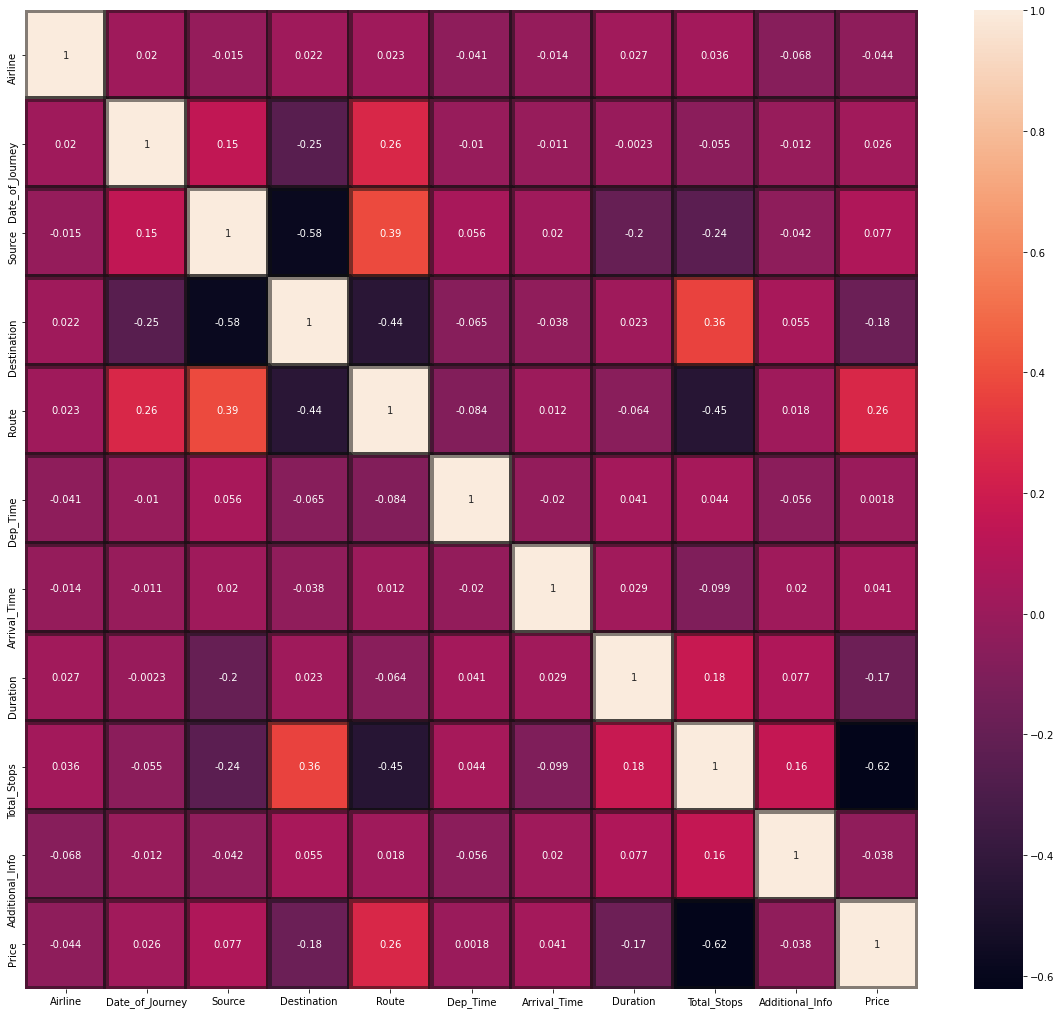

In [48]:
plt.figure(figsize=(20,18))
sn.heatmap(cor, annot=True, linewidth=5, linecolor='#0f0f0f80')

* In the above plot we observe that Price has the best correlation with Route column

# To check the columns +ve and -ve correlated

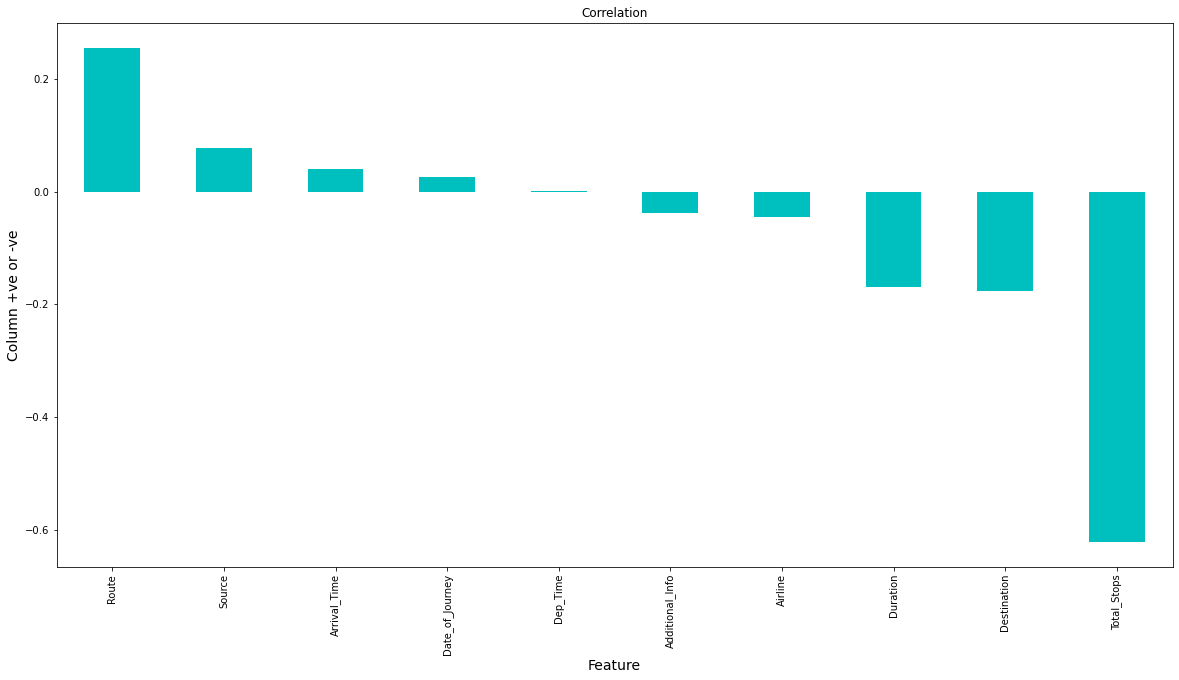

In [49]:
plt.figure(figsize=(20,10))
new_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar', color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column +ve or -ve', fontsize=14)
plt.title('Correlation', fontsize=12)
plt.show()

* In the above plot Column ['Route', 'Source', 'Arrival Time', 'Date of Journey'] are +vely correlated  and Column ['Additional Info', 'Airline', 'Duration', 'Destination', 'Total_stops'] are -vely correlated

* Here we confirm that Route has the best correlation with Target column

# DataPreprocessing

# Skewness check and Removal

In [50]:
new_df.skew()

Airline            0.731709
Date_of_Journey   -0.061918
Source            -0.439204
Destination        1.269454
Route             -0.511232
Dep_Time           0.194141
Arrival_Time      -0.608273
Duration          -0.216095
Total_Stops        0.617901
Additional_Info   -1.533587
Price              0.411094
dtype: float64

In [51]:
import scipy.stats as Stat
import matplotlib.pyplot as plt
import pylab

In [52]:
def Plotter(new_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    new_df[feature].hist()
    plt.subplot(1,2,2)
    Stat.probplot(new_df[feature],dist='norm',plot=pylab)
    plt.show()

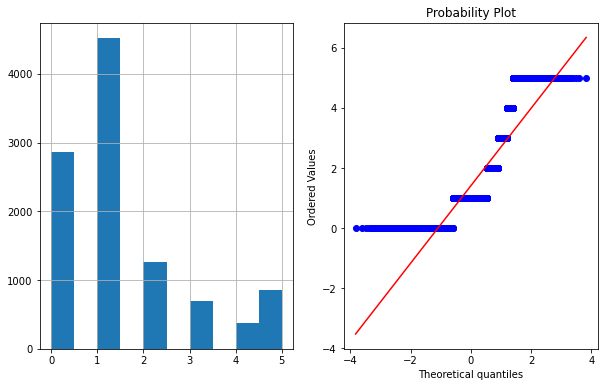

In [53]:
Plotter(new_df,'Destination')

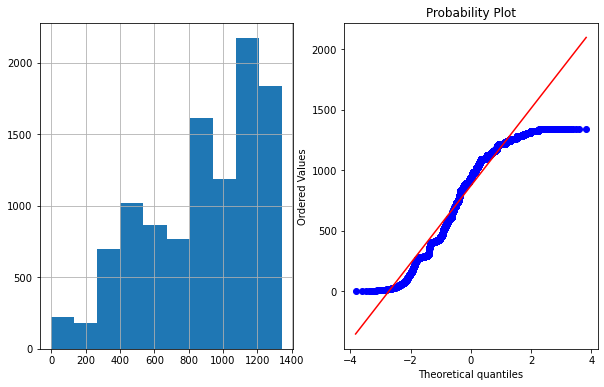

In [54]:
Plotter(new_df,'Arrival_Time')

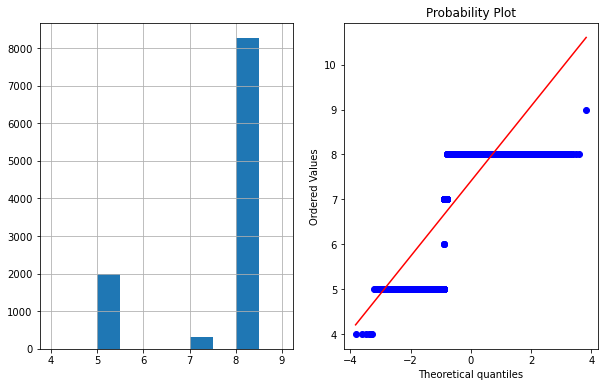

In [55]:
Plotter(new_df,'Additional_Info')

* From the above plots we observe only Arrival_Time follows a Gaussian distribution and we remove that column's skewness and for the others we perform balancing 

In [56]:
new_df['Arrival_Time'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

sqrt            exp  reciprocal       log
0      15.264338  1.551009e+101    0.004292  5.451038
1      30.099834            inf    0.001104  6.809039
2      20.322401  2.310048e+179    0.002421  6.023448
3      36.386811            inf    0.000755  7.188413
4      35.171011            inf    0.000808  7.120444
...          ...            ...         ...       ...
10678  35.482390            inf    0.000794  7.138073
10679  36.124784            inf    0.000766  7.173958
10680  28.705400            inf    0.001214  6.714171
10681  30.626786            inf    0.001066  6.843750
10682  33.526109            inf    0.000890  7.024649

[10578 rows x 4 columns]

In [57]:
from sklearn.preprocessing import PowerTransformer

In [58]:
new_df['Arrival_Time']=PowerTransformer('yeo-johnson').fit_transform(new_df[['Arrival_Time']])

In [59]:
new_df['Destination']=PowerTransformer('yeo-johnson').fit_transform(new_df[['Destination']])

In [60]:
new_df.skew()

Airline            0.731709
Date_of_Journey   -0.061918
Source            -0.439204
Destination        0.040863
Route             -0.511232
Dep_Time           0.194141
Arrival_Time      -0.382489
Duration          -0.216095
Total_Stops        0.617901
Additional_Info   -1.533587
Price              0.411094
dtype: float64

# Check and Balancing Columns with Imbalances to avoid Bias

In [61]:
AT = new_df.columns.tolist()
AT = [col for col in AT if col not in ['Airline']]

target1 = 'Airline'

state = np.random.RandomState(42)
a = new_df[AT]
b = new_df[target1]

a_outliers = state.uniform(low=0, high=1, size=(a.shape[0], a.shape[1]))
print(a.shape)

(10578, 10)


In [62]:
DT = new_df.columns.tolist()
DT = [col for col in DT if col not in ['Total_Stops']]

target3 = 'Total_Stops'

state = np.random.RandomState(42)
e = new_df[DT]
f = new_df[target3]

e_outliers = state.uniform(low=0, high=1, size=(e.shape[0], e.shape[1]))
print(e.shape)

(10578, 10)


In [63]:
EF = new_df.columns.tolist()
EF = [col for col in EF if col not in ['Additional_Info']]

target4 = 'Additional_Info'

state = np.random.RandomState(42)
g = new_df[EF]
h = new_df[target4]

g_outliers = state.uniform(low=0, high=1, size=(g.shape[0], g.shape[1]))
print(g.shape)

(10578, 10)


Text(0, 0.5, 'Frequency')

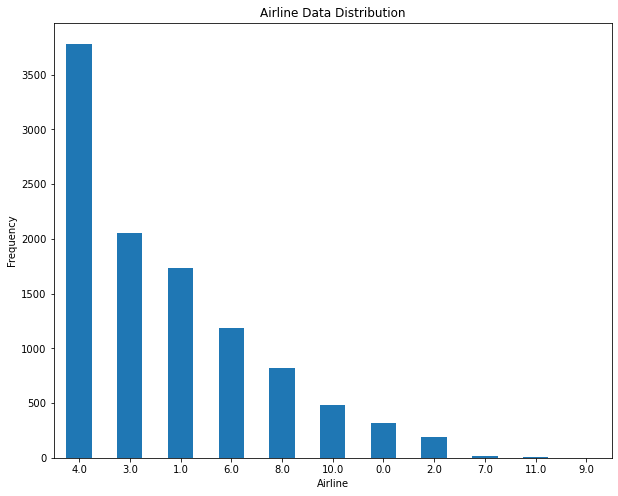

In [64]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Airline'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Airline Data Distribution")


plt.xlabel("Airline")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

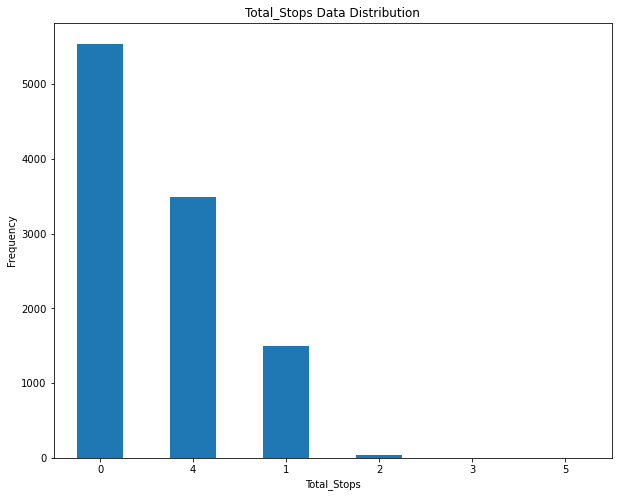

In [65]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Total_Stops'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Total_Stops Data Distribution")


plt.xlabel("Total_Stops")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

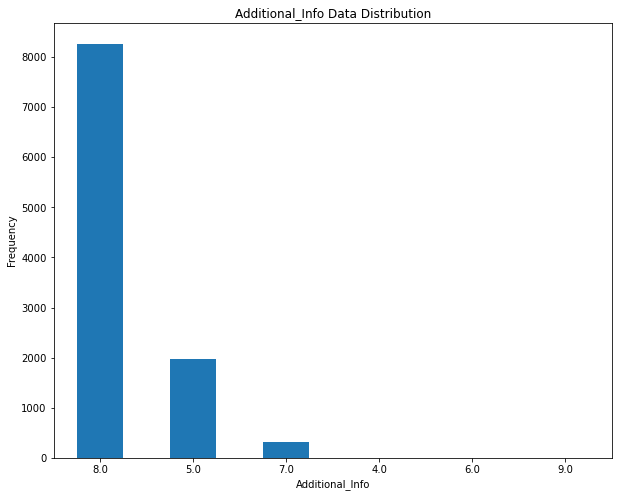

In [66]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Additional_Info'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Additional_Info Data Distribution")


plt.xlabel("Additional_Info")
plt.ylabel("Frequency")


In [67]:
NO1 = new_df[new_df['Airline']==0.0]
NO1.shape

(319, 11)

In [68]:
NO2 = new_df[new_df['Airline']==1.0]
NO2.shape

(1731, 11)

In [69]:
NO3 = new_df[new_df['Airline']==2.0]
NO3.shape

(194, 11)

In [70]:
NO4 = new_df[new_df['Airline']==3.0]
NO4.shape

(2053, 11)

In [71]:
NO5 = new_df[new_df['Airline']==4.0]
NO5.shape

(3783, 11)

In [72]:
NO6 = new_df[new_df['Airline']==5.0]
NO6.shape

(0, 11)

In [73]:
NO7 = new_df[new_df['Airline']==6.0]
NO7.shape

(1186, 11)

In [74]:
NO8 = new_df[new_df['Airline']==7.0]
NO8.shape

(13, 11)

In [75]:
NO9 = new_df[new_df['Airline']==8.0]
NO9.shape

(816, 11)

In [76]:
NO10 = new_df[new_df['Airline']==9.0]
NO10.shape

(1, 11)

In [77]:
NO11 = new_df[new_df['Airline']==10.0]
NO11.shape

(479, 11)

In [78]:
NO12 = new_df[new_df['Airline']==11.0]
NO12.shape

(3, 11)

In [79]:
NO13 = new_df[new_df['Airline']==0]
NO13.shape

(319, 11)

In [80]:
NO14 = new_df[new_df['Total_Stops']==0]
NO14.shape

(5541, 11)

In [81]:
NO15 = new_df[new_df['Total_Stops']==1]
NO15.shape

(1502, 11)

In [82]:
NO16 = new_df[new_df['Total_Stops']==2]
NO16.shape

(45, 11)

In [83]:
NO17 = new_df[new_df['Total_Stops']==3]
NO17.shape

(1, 11)

In [84]:
NO18 = new_df[new_df['Total_Stops']==4]
NO18.shape

(3488, 11)

In [85]:
NO19 = new_df[new_df['Total_Stops']==5]
NO19.shape

(1, 11)

In [86]:
NO20 = new_df[new_df['Additional_Info']==4.0]
NO20.shape

(6, 11)

In [87]:
NO21 = new_df[new_df['Additional_Info']==5.0]
NO21.shape

(1982, 11)

In [88]:
NO22 = new_df[new_df['Additional_Info']==6.0]
NO22.shape

(3, 11)

In [89]:
NO23 = new_df[new_df['Additional_Info']==7.0]
NO23.shape

(320, 11)

In [90]:
NO24 = new_df[new_df['Additional_Info']==8.0]
NO24.shape

(8266, 11)

In [91]:
NO23 = new_df[new_df['Additional_Info']==9.0]
NO23.shape

(1, 11)

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
os = RandomOverSampler()

In [94]:
A_train_res, B_train_res = os.fit_resample(a, b)

In [95]:
E_train_res, F_train_res = os.fit_resample(e, f)

In [96]:
G_train_res, H_train_res = os.fit_resample(g, h)

In [97]:
from collections import Counter

In [98]:
print('Original Airline dataset shape{}'.format(Counter(b)))

Original Airline dataset shapeCounter({4.0: 3783, 3.0: 2053, 1.0: 1731, 6.0: 1186, 8.0: 816, 10.0: 479, 0.0: 319, 2.0: 194, 7.0: 13, 11.0: 3, 9.0: 1})


In [99]:
print('Original Total_Stops dataset shape{}'.format(Counter(f)))

Original Total_Stops dataset shapeCounter({0: 5541, 4: 3488, 1: 1502, 2: 45, 5: 1, 3: 1})


In [100]:
print('Original Additional_Info dataset shape{}'.format(Counter(h)))

Original Additional_Info dataset shapeCounter({8.0: 8266, 5.0: 1982, 7.0: 320, 4.0: 6, 6.0: 3, 9.0: 1})


In [101]:
print('Resampled Airline dataset shape{}'.format(Counter(B_train_res)))

Resampled Airline dataset shapeCounter({3.0: 3783, 1.0: 3783, 4.0: 3783, 8.0: 3783, 6.0: 3783, 2.0: 3783, 10.0: 3783, 0.0: 3783, 11.0: 3783, 7.0: 3783, 9.0: 3783})


In [102]:
print('Resampled Total_Stops dataset shape{}'.format(Counter(F_train_res)))

Resampled Total_Stops dataset shapeCounter({4: 5541, 1: 5541, 0: 5541, 2: 5541, 5: 5541, 3: 5541})


In [103]:
print('Resampled Additional_Info dataset shape{}'.format(Counter(H_train_res)))

Resampled Additional_Info dataset shapeCounter({8.0: 8266, 5.0: 8266, 7.0: 8266, 6.0: 8266, 4.0: 8266, 9.0: 8266})


# Scaling DataFrame

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
for col in new_df:
    sc = StandardScaler()
    new_df[col] = sc.fit_transform(new_df[[col]])

# Separating the Features columns and Target Column:

In [106]:
features=new_df.drop("Price",axis=1)
target=new_df["Price"]

# Regression Test Model 1

In [107]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [108]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is: {r2_score(target_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is: {r2_score(target_test, pred_test)}")
    print("\n")

At random state 0,the training accuracy is: 0.40206430621838063
At random state 0,the testing accuracy is: 0.41106531401703494


At random state 1,the training accuracy is: 0.40237724287493015
At random state 1,the testing accuracy is: 0.40958670006370257


At random state 2,the training accuracy is: 0.4067742766983682
At random state 2,the testing accuracy is: 0.3982740452060176


At random state 3,the training accuracy is: 0.39930683507254827
At random state 3,the testing accuracy is: 0.4203264020081471


At random state 4,the training accuracy is: 0.4098275046769312
At random state 4,the testing accuracy is: 0.3881895344241668


At random state 5,the training accuracy is: 0.41208818866894326
At random state 5,the testing accuracy is: 0.38159742937094554


At random state 6,the training accuracy is: 0.4026773588636685
At random state 6,the testing accuracy is: 0.41053250577877987


At random state 7,the training accuracy is: 0.39820135055393424
At random state 7,the testing accuracy 

At random state 75,the testing accuracy is: 0.4127737353552595


At random state 76,the training accuracy is: 0.4052641797231794
At random state 76,the testing accuracy is: 0.4027645283496376


At random state 77,the training accuracy is: 0.40974857288257904
At random state 77,the testing accuracy is: 0.3884788251369721


At random state 78,the training accuracy is: 0.39709259708804867
At random state 78,the testing accuracy is: 0.42778958909387477


At random state 79,the training accuracy is: 0.4093475891577497
At random state 79,the testing accuracy is: 0.38948850576970506


At random state 80,the training accuracy is: 0.40454094473692603
At random state 80,the testing accuracy is: 0.40481455082322504


At random state 81,the training accuracy is: 0.4106025136529512
At random state 81,the testing accuracy is: 0.38587353720110673


At random state 82,the training accuracy is: 0.4063966581503542
At random state 82,the testing accuracy is: 0.39776372853085107


At random state 83,the t

At random state 157,the training accuracy is: 0.40296998977687193
At random state 157,the testing accuracy is: 0.4090023705549849


At random state 158,the training accuracy is: 0.3974078104711115
At random state 158,the testing accuracy is: 0.42537691338527406


At random state 159,the training accuracy is: 0.40566344451595415
At random state 159,the testing accuracy is: 0.4015321638375301


At random state 160,the training accuracy is: 0.40836231713698257
At random state 160,the testing accuracy is: 0.3930680323549499


At random state 161,the training accuracy is: 0.4021980025066644
At random state 161,the testing accuracy is: 0.4117999009018598


At random state 162,the training accuracy is: 0.40443829653334906
At random state 162,the testing accuracy is: 0.40398024693901136


At random state 163,the training accuracy is: 0.40487583410619066
At random state 163,the testing accuracy is: 0.40305029376565604


At random state 164,the training accuracy is: 0.4026362624861779
At random 

At random state 236,the training accuracy is: 0.4018256140260824
At random state 236,the testing accuracy is: 0.4118248658887945


At random state 237,the training accuracy is: 0.40807134738848905
At random state 237,the testing accuracy is: 0.39346273592145253


At random state 238,the training accuracy is: 0.4015965972726372
At random state 238,the testing accuracy is: 0.41412096712641666


At random state 239,the training accuracy is: 0.40414302532957913
At random state 239,the testing accuracy is: 0.40475744745768427


At random state 240,the training accuracy is: 0.4115210436687098
At random state 240,the testing accuracy is: 0.38366207231329896


At random state 241,the training accuracy is: 0.4030729195601006
At random state 241,the testing accuracy is: 0.40910867119893557


At random state 242,the training accuracy is: 0.4003398488846409
At random state 242,the testing accuracy is: 0.4160014538464448


At random state 243,the training accuracy is: 0.40972503401564175
At random 

At random state 319,the testing accuracy is: 0.4080866607607505


At random state 320,the training accuracy is: 0.4000646385419475
At random state 320,the testing accuracy is: 0.41843333044808684


At random state 321,the training accuracy is: 0.40574374787041745
At random state 321,the testing accuracy is: 0.40124197406859485


At random state 322,the training accuracy is: 0.40920752935525584
At random state 322,the testing accuracy is: 0.3894799181714982


At random state 323,the training accuracy is: 0.39673118780497085
At random state 323,the testing accuracy is: 0.4273243970238171


At random state 324,the training accuracy is: 0.4011056460675465
At random state 324,the testing accuracy is: 0.4150564881913117


At random state 325,the training accuracy is: 0.41042348526712524
At random state 325,the testing accuracy is: 0.3880994537549375


At random state 326,the training accuracy is: 0.40110387293255056
At random state 326,the testing accuracy is: 0.4152340132380432


At random 

At random state 403,the testing accuracy is: 0.3829378220451949


At random state 404,the training accuracy is: 0.40614234599873467
At random state 404,the testing accuracy is: 0.39993395510894625


At random state 405,the training accuracy is: 0.40046757220853224
At random state 405,the testing accuracy is: 0.4165632568681157


At random state 406,the training accuracy is: 0.406948089284758
At random state 406,the testing accuracy is: 0.39758848219513865


At random state 407,the training accuracy is: 0.39911052491804644
At random state 407,the testing accuracy is: 0.420803587877738


At random state 408,the training accuracy is: 0.4133967069591963
At random state 408,the testing accuracy is: 0.37924178367342776


At random state 409,the training accuracy is: 0.40966583289585035
At random state 409,the testing accuracy is: 0.38852212442527256


At random state 410,the training accuracy is: 0.39736125195958316
At random state 410,the testing accuracy is: 0.42574094657890016


At random

At random state 466,the training accuracy is: 0.40417405209391766
At random state 466,the testing accuracy is: 0.404473460766679


At random state 467,the training accuracy is: 0.4039323640124073
At random state 467,the testing accuracy is: 0.4065808865030448


At random state 468,the training accuracy is: 0.4051148578687058
At random state 468,the testing accuracy is: 0.4031744371563232


At random state 469,the training accuracy is: 0.40765414962192503
At random state 469,the testing accuracy is: 0.3942491536316738


At random state 470,the training accuracy is: 0.4098238852817062
At random state 470,the testing accuracy is: 0.38861542797018467


At random state 471,the training accuracy is: 0.41343775406003214
At random state 471,the testing accuracy is: 0.37786853309262125


At random state 472,the training accuracy is: 0.3981603592667182
At random state 472,the testing accuracy is: 0.4235650974248282


At random state 473,the training accuracy is: 0.40476675889924807
At random sta

In [109]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=15)

In [110]:
lr.fit(features_train, target_train)

LinearRegression()

In [111]:
pred_test=lr.predict(features_test)

In [112]:
mean_absolute_error(target_test, pred_test)

0.620708780742514

# The mean absolute error in each measuring data is at : 0.620708780742514 % -- Which is > 5%. And this is good for our model

In [113]:
r2_score(target_test, pred_test)

0.4054979959500572

# Here we observe that for this model we get :40% Accuracy

# Cross-Validation the Model 1

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
lin_score = cross_val_score(lr,features,target,cv=5,scoring='neg_mean_absolute_error')

In [116]:
lin_score_n = -lin_score
lin_score_n

array([0.62330503, 0.6101815 , 0.61284313, 0.60402692, 0.60919099])

In [117]:
np.mean(lin_score_n)

0.611909512570473

# Here we find that the Actual Mean Difference error is 0.611909512570473 % and not at 0.620708780742514 % when cross validated at Random State 15 and difference in its accuracy is at 0.00879926817204102 % which is good for our model

In [118]:
0.620708780742514 - 0.611909512570473

0.00879926817204102

# Regression Test Model 2

In [119]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [120]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    GBR.fit(features_train, target_train)
    pred_train=GBR.predict(features_train)
    pred_test=GBR.predict(features_test)
    print(f"At random state {i},the training accuracy is: {r2_score(target_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is: {r2_score(target_test, pred_test)}")
    print("\n")

At random state 0,the training accuracy is: 0.8383914091955266
At random state 0,the testing accuracy is: 0.8313106669631751


At random state 1,the training accuracy is: 0.8367872447674095
At random state 1,the testing accuracy is: 0.8415991822952213


At random state 2,the training accuracy is: 0.838432319982376
At random state 2,the testing accuracy is: 0.8316358693047821


At random state 3,the training accuracy is: 0.836294481562616
At random state 3,the testing accuracy is: 0.8240000634451047


At random state 4,the training accuracy is: 0.8384682571171985
At random state 4,the testing accuracy is: 0.826988743429684


At random state 5,the training accuracy is: 0.8387312326648017
At random state 5,the testing accuracy is: 0.8215777388057772


At random state 6,the training accuracy is: 0.8356712621550476
At random state 6,the testing accuracy is: 0.8279983702920076


At random state 7,the training accuracy is: 0.8360628192048947
At random state 7,the testing accuracy is: 0.841698

At random state 64,the training accuracy is: 0.8352046111883993
At random state 64,the testing accuracy is: 0.8362233110566339


At random state 65,the training accuracy is: 0.8385318204754565
At random state 65,the testing accuracy is: 0.8265859986643007


At random state 66,the training accuracy is: 0.8394305571303646
At random state 66,the testing accuracy is: 0.8274938254620704


At random state 67,the training accuracy is: 0.8386246433776781
At random state 67,the testing accuracy is: 0.8318082078419792


At random state 68,the training accuracy is: 0.8388791073775539
At random state 68,the testing accuracy is: 0.8278952530496522


At random state 69,the training accuracy is: 0.8359136064032517
At random state 69,the testing accuracy is: 0.8382472074112257


At random state 70,the training accuracy is: 0.839337661228427
At random state 70,the testing accuracy is: 0.8241230782191811


At random state 71,the training accuracy is: 0.8382949919191494
At random state 71,the testing acc

In [121]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=15)

In [122]:
GBR.fit(features_train, target_train)

GradientBoostingRegressor()

In [123]:
pred_test=GBR.predict(features_test)

In [124]:
mean_absolute_error(target_test, pred_test)

0.2980816651675473

# The mean absolute error in each measuring data is at : 0.2981065129814116.% -- Which is < 5%. And this is good for our model

In [125]:
r2_score(target_test, pred_test)

0.8389434147141338

# Here we observe that for this model we get : 83% Accuracy

# Cross-Validation the Model 2

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
lin_score = cross_val_score(GBR,features,target,cv=5,scoring='neg_mean_absolute_error')

In [128]:
lin_score_n = -lin_score
lin_score_n

array([0.30430231, 0.30168584, 0.29569088, 0.30322074, 0.29717667])

In [129]:
np.mean(lin_score_n)

0.30041528790560423

# Here we find that the Actual Mean Difference error is 0.3004227487558008 % and not at 0.2981065129814116 % when cross validated at Random State 15 and difference in its accuracy is at 0.0023162357743891637 % which is good for our model

In [130]:
0.3004227487558008 - 0.2981065129814116

0.0023162357743891637

# Regression Test Model 3

In [131]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
KR= ElasticNet()

In [132]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    KR.fit(features_train, target_train)
    pred_train=KR.predict(features_train)
    pred_test=KR.predict(features_test)
    print(f"At random state {i},the training accuracy is: {r2_score(target_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is: {r2_score(target_test, pred_test)}")
    print("\n")

At random state 0,the training accuracy is: 0.09146825775137113
At random state 0,the testing accuracy is: 0.08939484503921713


At random state 1,the training accuracy is: 0.0905756721556894
At random state 1,the testing accuracy is: 0.0893656807073363


At random state 2,the training accuracy is: 0.09410081334974374
At random state 2,the testing accuracy is: 0.09297312390433732


At random state 3,the training accuracy is: 0.0886095496361281
At random state 3,the testing accuracy is: 0.09055168604935537


At random state 4,the training accuracy is: 0.09850192205854913
At random state 4,the testing accuracy is: 0.09564438086362015


At random state 5,the training accuracy is: 0.1008409190315388
At random state 5,the testing accuracy is: 0.09693483454044816


At random state 6,the training accuracy is: 0.09298953556603295
At random state 6,the testing accuracy is: 0.09576213189890115


At random state 7,the training accuracy is: 0.08638943906334229
At random state 7,the testing accurac

At random state 81,the testing accuracy is: 0.09661832568293927


At random state 82,the training accuracy is: 0.09443826818353374
At random state 82,the testing accuracy is: 0.09324804346483562


At random state 83,the training accuracy is: 0.09586794806113874
At random state 83,the testing accuracy is: 0.09471935661827058


At random state 84,the training accuracy is: 0.09477583116683397
At random state 84,the testing accuracy is: 0.09337025405966093


At random state 85,the training accuracy is: 0.08776476438343861
At random state 85,the testing accuracy is: 0.0898367685362893


At random state 86,the training accuracy is: 0.09232012562621794
At random state 86,the testing accuracy is: 0.09248594149130085


At random state 87,the training accuracy is: 0.0954885823583701
At random state 87,the testing accuracy is: 0.09401094769314722


At random state 88,the training accuracy is: 0.0974328686526229
At random state 88,the testing accuracy is: 0.09368115466976534


At random state 89,t

At random state 163,the testing accuracy is: 0.09721990685025761


At random state 164,the training accuracy is: 0.0928304276947357
At random state 164,the testing accuracy is: 0.09129104211254568


At random state 165,the training accuracy is: 0.09316833256511636
At random state 165,the testing accuracy is: 0.09343753211484074


At random state 166,the training accuracy is: 0.09475800647706578
At random state 166,the testing accuracy is: 0.09554640410555493


At random state 167,the training accuracy is: 0.0893216879195452
At random state 167,the testing accuracy is: 0.09079956279262791


At random state 168,the training accuracy is: 0.09185109856803686
At random state 168,the testing accuracy is: 0.09453937156956194


At random state 169,the training accuracy is: 0.09316471034599427
At random state 169,the testing accuracy is: 0.09315150167410025


At random state 170,the training accuracy is: 0.09537633526304057
At random state 170,the testing accuracy is: 0.09617232582064805


At r

At random state 239,the testing accuracy is: 0.09277265956036784


At random state 240,the training accuracy is: 0.09967166440643471
At random state 240,the testing accuracy is: 0.09522255293297444


At random state 241,the training accuracy is: 0.09250108745061147
At random state 241,the testing accuracy is: 0.09292153332005659


At random state 242,the training accuracy is: 0.09234281483973517
At random state 242,the testing accuracy is: 0.09476271824879567


At random state 243,the training accuracy is: 0.09835293339971762
At random state 243,the testing accuracy is: 0.09718326400572908


At random state 244,the training accuracy is: 0.09575723774607503
At random state 244,the testing accuracy is: 0.09410497764468573


At random state 245,the training accuracy is: 0.09721899506791776
At random state 245,the testing accuracy is: 0.0954087054196634


At random state 246,the training accuracy is: 0.09700565965484376
At random state 246,the testing accuracy is: 0.09580100494532506


At 

At random state 307,the testing accuracy is: 0.09228589063561699


At random state 308,the training accuracy is: 0.09463631196586808
At random state 308,the testing accuracy is: 0.09053188764127618


At random state 309,the training accuracy is: 0.0943794563914353
At random state 309,the testing accuracy is: 0.09726140116291015


At random state 310,the training accuracy is: 0.10089375971576797
At random state 310,the testing accuracy is: 0.09812931719484319


At random state 311,the training accuracy is: 0.09515709517444637
At random state 311,the testing accuracy is: 0.09695999622240092


At random state 312,the training accuracy is: 0.09338373360275976
At random state 312,the testing accuracy is: 0.09511262965406386


At random state 313,the training accuracy is: 0.08726865158036101
At random state 313,the testing accuracy is: 0.08902373618559001


At random state 314,the training accuracy is: 0.09453135149977443
At random state 314,the testing accuracy is: 0.09587443484446923


At 

At random state 385,the testing accuracy is: 0.09488926842265366


At random state 386,the training accuracy is: 0.09502675409284989
At random state 386,the testing accuracy is: 0.09329416266302615


At random state 387,the training accuracy is: 0.0897005521467874
At random state 387,the testing accuracy is: 0.08972688057997025


At random state 388,the training accuracy is: 0.09268502773772991
At random state 388,the testing accuracy is: 0.09319370936682447


At random state 389,the training accuracy is: 0.0921616437525099
At random state 389,the testing accuracy is: 0.09545043538235043


At random state 390,the training accuracy is: 0.09460189707150901
At random state 390,the testing accuracy is: 0.09243069996911213


At random state 391,the training accuracy is: 0.09528037133513201
At random state 391,the testing accuracy is: 0.09252422682858463


At random state 392,the training accuracy is: 0.09656144256175936
At random state 392,the testing accuracy is: 0.0964375593904957


At ra


At random state 459,the training accuracy is: 0.08995519778201955
At random state 459,the testing accuracy is: 0.09236522543389358


At random state 460,the training accuracy is: 0.09712633016406158
At random state 460,the testing accuracy is: 0.0909346661094319


At random state 461,the training accuracy is: 0.09419398784173416
At random state 461,the testing accuracy is: 0.09231439802121677


At random state 462,the training accuracy is: 0.10004058093283896
At random state 462,the testing accuracy is: 0.09415560706010906


At random state 463,the training accuracy is: 0.09953724747618597
At random state 463,the testing accuracy is: 0.09559738666789042


At random state 464,the training accuracy is: 0.10519002976975722
At random state 464,the testing accuracy is: 0.09866218047832986


At random state 465,the training accuracy is: 0.09382467995583454
At random state 465,the testing accuracy is: 0.09357869580138123


At random state 466,the training accuracy is: 0.0912010399315275
At r

In [133]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=15)

In [134]:
KR.fit(features_train, target_train)

ElasticNet()

In [135]:
pred_test=KR.predict(features_test)

In [136]:
mean_absolute_error(target_test, pred_test)

0.8274095805572685

# The mean absolute error in each measuring data is at : 0.8274095805572685 % -- Which is < 5%. And this is good for our model

In [137]:
r2_score(target_test, pred_test)

0.08985965407911456

# Here we observe that for this model we get : 08% Accuracy

# Cross-Validation the Model 3

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
lin_score = cross_val_score(KR,features,target,cv=5,scoring='neg_mean_absolute_error')

In [140]:
lin_score_n = -lin_score
lin_score_n

array([0.82228164, 0.82473113, 0.81299381, 0.79866403, 0.80315609])

In [141]:
np.mean(lin_score_n)

0.8123653393908367

# Here we find that the Actual Mean Difference error is 0.8123653393908367 % and not at 0.8274095805572685 % when cross validated at Random State 15 and difference in its accuracy is at 0.015044241166431882 % which is Very good in terms of choosing a model

In [142]:
0.8274095805572685 - 0.8123653393908367

0.015044241166431882

# Regression Test Model 4

In [143]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor
CB= XGBRegressor()

In [144]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    CB.fit(features_train, target_train)
    pred_train=CB.predict(features_train)
    pred_test=CB.predict(features_test)
    print(f"At random state {i},the training accuracy is: {r2_score(target_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is: {r2_score(target_test, pred_test)}")
    print("\n")

At random state 0,the training accuracy is: 0.9719290415079236
At random state 0,the testing accuracy is: 0.921823719994861


At random state 1,the training accuracy is: 0.9695974805535679
At random state 1,the testing accuracy is: 0.9268761515352433


At random state 2,the training accuracy is: 0.9706865630493373
At random state 2,the testing accuracy is: 0.925876543013543


At random state 3,the training accuracy is: 0.9715456544861085
At random state 3,the testing accuracy is: 0.9230694985608738


At random state 4,the training accuracy is: 0.9702961021367491
At random state 4,the testing accuracy is: 0.9241995201624953


At random state 5,the training accuracy is: 0.9701626775714173
At random state 5,the testing accuracy is: 0.9242964361431661


At random state 6,the training accuracy is: 0.9698745275990917
At random state 6,the testing accuracy is: 0.9199454274115657


At random state 7,the training accuracy is: 0.9712212991160755
At random state 7,the testing accuracy is: 0.92531

At random state 64,the training accuracy is: 0.969694305855437
At random state 64,the testing accuracy is: 0.9256127024528442


At random state 65,the training accuracy is: 0.9709774800732153
At random state 65,the testing accuracy is: 0.9245942420812625


At random state 66,the training accuracy is: 0.9695094536051198
At random state 66,the testing accuracy is: 0.9207385285787666


At random state 67,the training accuracy is: 0.9706735730997774
At random state 67,the testing accuracy is: 0.9222107136539877


At random state 68,the training accuracy is: 0.9699166749246498
At random state 68,the testing accuracy is: 0.9231699965607222


At random state 69,the training accuracy is: 0.9707874011718907
At random state 69,the testing accuracy is: 0.9189219241542171


At random state 70,the training accuracy is: 0.972047735683694
At random state 70,the testing accuracy is: 0.9188600364019345


At random state 71,the training accuracy is: 0.9716499655801253
At random state 71,the testing accu

In [145]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=15)

In [146]:
CB.fit(features_train, target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [147]:
pred_test=CB.predict(features_test)

In [148]:
mean_absolute_error(target_test, pred_test)

0.17311930874152184

# The mean absolute error in each measuring data is at : 0.17311930874152184 % -- Which is < 5%. And this is good for our model

In [149]:
r2_score(target_test, pred_test)

0.9329739319703345

# Here we observe that for this model we get : 93% Accuracy

# Cross-Validation the Model 4

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
lin_score = cross_val_score(CB,features,target,cv=5,scoring='neg_mean_absolute_error')

In [152]:
lin_score_n = -lin_score
lin_score_n

array([0.17961658, 0.18280893, 0.17741144, 0.18189185, 0.17552627])

In [153]:
np.mean(lin_score_n)

0.17945101449398115

# Here we find that the Actual Mean Difference error is 0.17945101449398115 % and not at  0.17311930874152184 % when cross validated at Random State 15 and difference in its accuracy is at 0.00633170575245931 % which is Very good in terms of choosing a model

In [154]:
0.17945101449398115 - 0.17311930874152184

0.00633170575245931

# Regression Test Model 5

In [155]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
SG=SGDRegressor()

In [156]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    SG.fit(features_train, target_train)
    pred_train=SG.predict(features_train)
    pred_test=SG.predict(features_test)
    print(f"At random state {i},the training accuracy is: {r2_score(target_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is: {r2_score(target_test, pred_test)}")
    print("\n")

At random state 0,the training accuracy is: 0.4017180739043964
At random state 0,the testing accuracy is: 0.40977295326269625


At random state 1,the training accuracy is: 0.39961350555520514
At random state 1,the testing accuracy is: 0.40542369833584513


At random state 2,the training accuracy is: 0.405128291038789
At random state 2,the testing accuracy is: 0.3960006740464206


At random state 3,the training accuracy is: 0.39836682945073054
At random state 3,the testing accuracy is: 0.4181804067429453


At random state 4,the training accuracy is: 0.40860104434095346
At random state 4,the testing accuracy is: 0.38836894233725405


At random state 5,the training accuracy is: 0.41095339302794
At random state 5,the testing accuracy is: 0.3803737118575691


At random state 6,the training accuracy is: 0.40170041551482216
At random state 6,the testing accuracy is: 0.4097943171028725


At random state 7,the training accuracy is: 0.39720445329580656
At random state 7,the testing accuracy is: 

At random state 67,the testing accuracy is: 0.4053006717530181


At random state 68,the training accuracy is: 0.40271396505962564
At random state 68,the testing accuracy is: 0.4052284990649665


At random state 69,the training accuracy is: 0.39780256646080336
At random state 69,the testing accuracy is: 0.4240874681225725


At random state 70,the training accuracy is: 0.4025706059377808
At random state 70,the testing accuracy is: 0.40731376518248963


At random state 71,the training accuracy is: 0.4032723382333193
At random state 71,the testing accuracy is: 0.4014084938307029


At random state 72,the training accuracy is: 0.4050603450108594
At random state 72,the testing accuracy is: 0.396643243430539


At random state 73,the training accuracy is: 0.4022639207715757
At random state 73,the testing accuracy is: 0.3999055557218745


At random state 74,the training accuracy is: 0.3965578419082828
At random state 74,the testing accuracy is: 0.42079424940017973


At random state 75,the traini

At random state 130,the testing accuracy is: 0.40331325617637537


At random state 131,the training accuracy is: 0.4007473715576366
At random state 131,the testing accuracy is: 0.410309675224103


At random state 132,the training accuracy is: 0.40563715497541375
At random state 132,the testing accuracy is: 0.3981961890586393


At random state 133,the training accuracy is: 0.4085158341428632
At random state 133,the testing accuracy is: 0.387938991796584


At random state 134,the training accuracy is: 0.3996692248836806
At random state 134,the testing accuracy is: 0.4156926293330553


At random state 135,the training accuracy is: 0.4075618247623637
At random state 135,the testing accuracy is: 0.3871535560180219


At random state 136,the training accuracy is: 0.40270418713800615
At random state 136,the testing accuracy is: 0.40736768551609925


At random state 137,the training accuracy is: 0.4080084142866006
At random state 137,the testing accuracy is: 0.3863579072260599


At random state

At random state 194,the testing accuracy is: 0.4214156821005912


At random state 195,the training accuracy is: 0.4070925026520351
At random state 195,the testing accuracy is: 0.3879659361904896


At random state 196,the training accuracy is: 0.4043711402592016
At random state 196,the testing accuracy is: 0.40464939962242885


At random state 197,the training accuracy is: 0.39661536240036077
At random state 197,the testing accuracy is: 0.4260143938041301


At random state 198,the training accuracy is: 0.4018320106269849
At random state 198,the testing accuracy is: 0.40660551597531625


At random state 199,the training accuracy is: 0.40397764957393323
At random state 199,the testing accuracy is: 0.404033651072786


At random state 200,the training accuracy is: 0.40394308603580154
At random state 200,the testing accuracy is: 0.4023546178258063


At random state 201,the training accuracy is: 0.40472631148216975
At random state 201,the testing accuracy is: 0.4023294371414877


At random st

At random state 266,the testing accuracy is: 0.3977220490281894


At random state 267,the training accuracy is: 0.40650411267909126
At random state 267,the testing accuracy is: 0.3893119981370816


At random state 268,the training accuracy is: 0.4064921307496483
At random state 268,the testing accuracy is: 0.3969669126597706


At random state 269,the training accuracy is: 0.4053944232764837
At random state 269,the testing accuracy is: 0.3975046842560829


At random state 270,the training accuracy is: 0.4061076391078198
At random state 270,the testing accuracy is: 0.3973659334644696


At random state 271,the training accuracy is: 0.4077602488061258
At random state 271,the testing accuracy is: 0.3932380000539937


At random state 272,the training accuracy is: 0.40686771717680825
At random state 272,the testing accuracy is: 0.3916328228440711


At random state 273,the training accuracy is: 0.4005193075901742
At random state 273,the testing accuracy is: 0.41304894481198673


At random stat

At random state 337,the training accuracy is: 0.39966973301284336
At random state 337,the testing accuracy is: 0.41369715318017797


At random state 338,the training accuracy is: 0.40253663031758125
At random state 338,the testing accuracy is: 0.3998827392684091


At random state 339,the training accuracy is: 0.4030237089589299
At random state 339,the testing accuracy is: 0.40479284016234873


At random state 340,the training accuracy is: 0.40380856081574756
At random state 340,the testing accuracy is: 0.4024045907649948


At random state 341,the training accuracy is: 0.4017270703500444
At random state 341,the testing accuracy is: 0.41012340355085597


At random state 342,the training accuracy is: 0.40267992458204327
At random state 342,the testing accuracy is: 0.40432905793928586


At random state 343,the training accuracy is: 0.4069018735946238
At random state 343,the testing accuracy is: 0.39449941967259994


At random state 344,the training accuracy is: 0.40092986775049144
At rando

At random state 408,the testing accuracy is: 0.3779281992385721


At random state 409,the training accuracy is: 0.40886652471794094
At random state 409,the testing accuracy is: 0.38650506431727816


At random state 410,the training accuracy is: 0.393621086825778
At random state 410,the testing accuracy is: 0.4222901071102526


At random state 411,the training accuracy is: 0.40948855866921563
At random state 411,the testing accuracy is: 0.3852398788403685


At random state 412,the training accuracy is: 0.40132788959888754
At random state 412,the testing accuracy is: 0.40863295336982597


At random state 413,the training accuracy is: 0.3980351374359665
At random state 413,the testing accuracy is: 0.41986818946084314


At random state 414,the training accuracy is: 0.3997434832501594
At random state 414,the testing accuracy is: 0.4115471395671195


At random state 415,the training accuracy is: 0.40046225244669076
At random state 415,the testing accuracy is: 0.4102743608439976


At random s

At random state 475,the training accuracy is: 0.4042766281477266
At random state 475,the testing accuracy is: 0.40159331378635166


At random state 476,the training accuracy is: 0.4086387022221344
At random state 476,the testing accuracy is: 0.3910832156416374


At random state 477,the training accuracy is: 0.4011204863101199
At random state 477,the testing accuracy is: 0.4099608908669916


At random state 478,the training accuracy is: 0.3972962661013253
At random state 478,the testing accuracy is: 0.4167327100447


At random state 479,the training accuracy is: 0.4047546435938897
At random state 479,the testing accuracy is: 0.3997088367328865


At random state 480,the training accuracy is: 0.40971391680782143
At random state 480,the testing accuracy is: 0.38513088797837713


At random state 481,the training accuracy is: 0.4047011012136793
At random state 481,the testing accuracy is: 0.3974256316120147


At random state 482,the training accuracy is: 0.39663750688064203
At random state 4

In [157]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=15)

In [158]:
SG.fit(features_train, target_train)

SGDRegressor()

In [159]:
pred_test=SG.predict(features_test)

In [160]:
mean_absolute_error(target_test, pred_test)

0.6205906348279413

# The mean absolute error in each measuring data is at : 0.6215918780352288 %  -- Which is > 5%. And this is good for our model

In [161]:
r2_score(target_test, pred_test)

0.40608629547803576

# Here we observe that for this model we get : 40% Accuracy

# Cross-Validation the Model 5

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
lin_score = cross_val_score(SG,features,target,cv=5,scoring='neg_mean_absolute_error')

In [164]:
lin_score_n = -lin_score
lin_score_n

array([0.62570145, 0.60784029, 0.61266159, 0.60466068, 0.60642431])

In [165]:
np.mean(lin_score_n)

0.6114576630249464

# Here we find that the Actual Mean Difference error is 0.6121416757892588 % and not at 0.6215918780352288 % when cross validated at Random State 15 and difference in its accuracy is at 0.00945020224596993 % which is good in terms of choosing a model

In [166]:
0.6215918780352288 - 0.6121416757892588

0.00945020224596993

# Here we choose Regression Model 4 for Hyper Parameter Tuning, XGBRegressor as it gives better accuracy than any other Models

In [167]:
CB.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

# Hyper Parameter Tuning

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
Parameters = {'objective': ['reg:squarederror'],
'tree_method': ['auto'],
'base_score': [0.01],
'booster': ['gbtree'],
'colsample_bylevel': [0.7],
'colsample_bynode': [0.7],
'colsample_bytree': [0.7],
'gamma': [0.01],
'importance_type': [1],
'learning_rate': [0.9],
'max_delta_step': [1],
'max_depth': [6],
'min_child_weight': [1],
'predictor': ['auto'],
'reg_alpha': [0.4],
'reg_lambda': [0.03],
'subsample': [1],
'num_parallel_tree': [8]
} 

In [170]:
GCV = GridSearchCV(XGBRegressor(random_state=15),Parameters,cv=5,verbose=0,n_jobs=-1) 

In [171]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                         'colsample_bylevel': [0.7], 'colsample_bynode': [0.7],
                         'colsample_bytree': [0.7], 'gamma': [0.01],
                         'importance_type': [1], 'learning_rate': [0.9],
                         'max_delt

In [172]:
PP = GCV.predict(features_test)

In [173]:
Final_scorer2 = r2_score(target_test, PP)

In [174]:
Final_scorer2

0.9407688583881365

# Here we are able to achieve increase from 93 % to 94 % and the differnce is 0.007794926417801995

# Model saving

In [175]:
import pickle
filename = 'FlightPrediction.pkl'
pickle.dump(Final_scorer2, open(filename, 'wb'))

# Conclusion

In [176]:
import numpy as np
a = np.array(target_test)
predicted = np.array(GCV.predict(features_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))
df_conclusion

Original  Predicted
0     0.337783   0.545932
1    -1.185097  -1.071888
2    -0.792127  -0.849134
3    -0.039921  -0.143597
4     1.332025   1.458966
...        ...        ...
2640 -0.790896  -0.728252
2641 -0.888646  -0.720735
2642 -1.238773  -1.354371
2643 -0.129053  -0.001787
2644  0.993963   0.870421

[2645 rows x 2 columns]